In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as md
import matplotlib.pyplot as plt

MEASUREMENTS = "Corrected Upscaled Measurement [MW]"

def plot_dataset(file: str, month: str, outputfile: str):
    data = pd.read_excel(file, skiprows=3)
    data['DateTime'] = pd.to_datetime(data['DateTime'], format = '%d/%m/%Y %H:%M')
    fig, ax = plt.subplots()
    sns.lineplot(ax = ax, data=data, x=data["DateTime"], y=data[MEASUREMENTS]).set_title(f"Recurring patterns in solar power for {month}")
    ax.xaxis.set_major_locator(md.DayLocator(interval = 1))
    ax.xaxis.set_major_formatter(md.DateFormatter('%d'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 0)
    ax.tick_params(axis = 'x', which = 'major', length = 10)
    ax.set_xlim(data['DateTime'].min(), data['DateTime'].max())
    ax.set_ylim([0, 6000])
    ax.set_xlabel(f"Day of month ({month})")
    fig.savefig(outputfile)


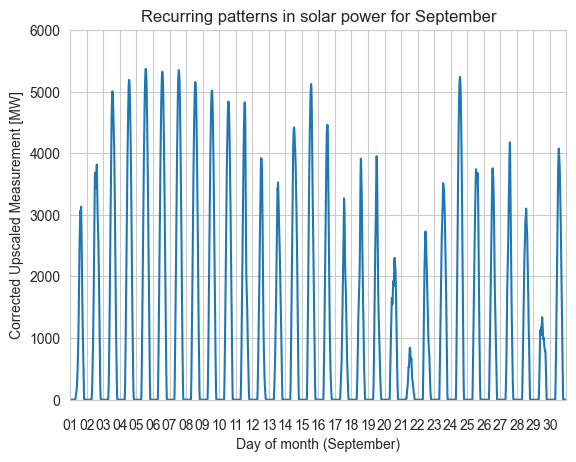

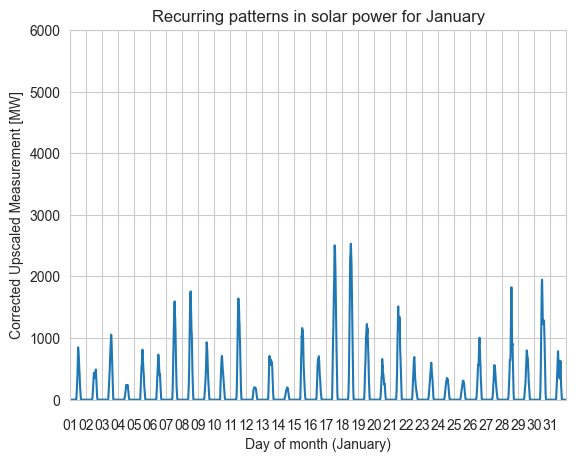

In [15]:
plot_dataset("data/SolarForecast_20230901-20230930.xls", "September", "figures/recurrent-pattern-september2023.png")
plot_dataset("data/SolarForecast_20230101-20230131.xls", "January", "figures/recurrent-pattern-january2023.png")
